# STAT 208 Final Project Code
## Customer Segmentation Analysis


### Information:
For detail, please refer to our [GitHub](https://github.com/Jen-uis/STAT208_Team8) page.
  

  
### Contact:
This Project Code is subject to the team as:
- Nathaniel Zhu
- Xujuan Liang
- Xiaoya Wei
- Youyi Fu

In [1]:
# Loading Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, cross_val_predict

## Part I: Pre-analysis of the Data

In [2]:
# First, load the dataset
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

# This steps was created while dealing with Part III,
# fill the NAs using forward fill function
train_data.ffill(inplace = True)
test_data.ffill(inplace = True)

In [3]:
# Show basic information about the datasets
print("Train Dataset Info:")
print(train_data.info())
print("\nTest Dataset Info:")
print(test_data.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -----------

In [4]:
# Summary statistics for numerical features
print("\nSummary Statistics for Train Dataset:")
print(train_data.describe())

# Summary statistics for numerical features in test dataset
print("\nSummary Statistics for Test Dataset:")
print(test_data.describe())


Summary Statistics for Train Dataset:
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      8068.000000  8068.000000
mean   463479.214551    43.466906         2.618741     2.846678
std      2595.381232    16.711696         3.394284     1.530377
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000

Summary Statistics for Test Dataset:
                  ID          Age  Work_Experience  Family_Size
count    2627.000000  2627.000000      2627.000000  2627.000000
mean   463433.918919    43.649791         2.590788     2.832509
std      2618.245698    16.967015         3.362414     1.571149
min    458989.000000    18.000000         0.000000     1.000000
25%    461162.500000    30.

In [5]:
# Count of missing values per column
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())

# Count of missing values per column in test dataset
print("\nMissing Values in Test Dataset:")
print(test_data.isnull().sum())


Missing Values in Train Dataset:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Missing Values in Test Dataset:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [6]:
# Printing head data
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


## Part II: Descriptive Analysis

In [7]:
# Gender Data preparation
gender = train_data.groupby('Gender').count().reset_index()[['Gender','Age']]
gender.rename(columns = {'Age':'Count'}, inplace = True)
gender

,Gender,Count
0,Female,3651
1,Male,4417


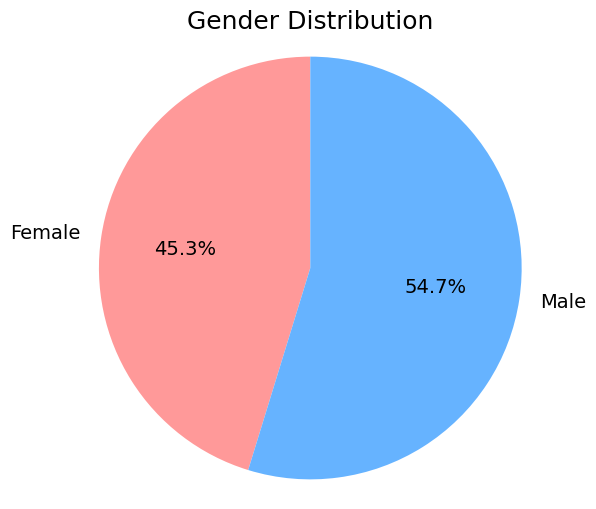

In [8]:
# Gender Distribution Visualization
plt.figure(figsize = (6, 6))
colors = ['#ff9999','#66b3ff']
plt.pie(gender['Count'], labels = gender['Gender'], autopct = '%1.1f%%', startangle = 90, colors = colors, textprops = {'fontsize': 14})

plt.title('Gender Distribution', fontsize = 18)

plt.axis('equal')

plt.show()

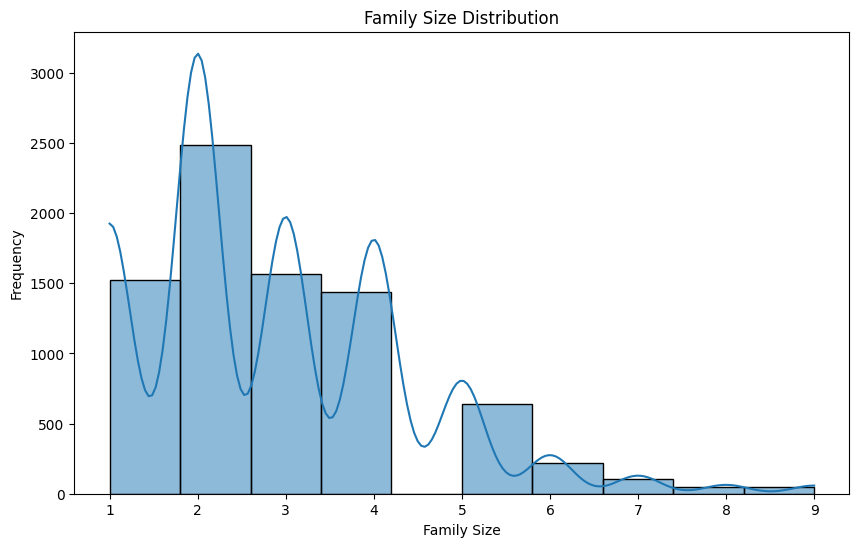

In [9]:
# Family Size Distribution Analysis
plt.figure(figsize = (10, 6))
sns.histplot(train_data['Family_Size'], bins = 10, kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

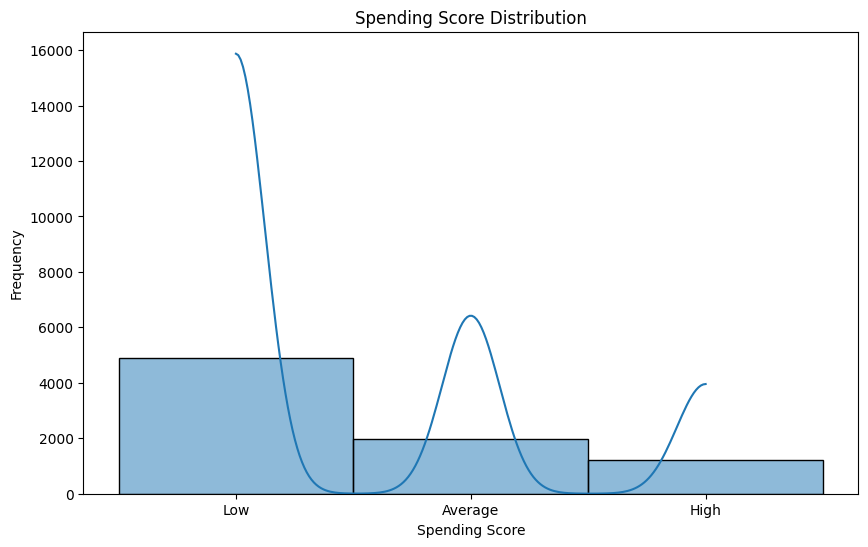

In [10]:
# Spending Score Distribution Visualization
plt.figure(figsize = (10, 6))
sns.histplot(train_data['Spending_Score'], bins  =20, kde = True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

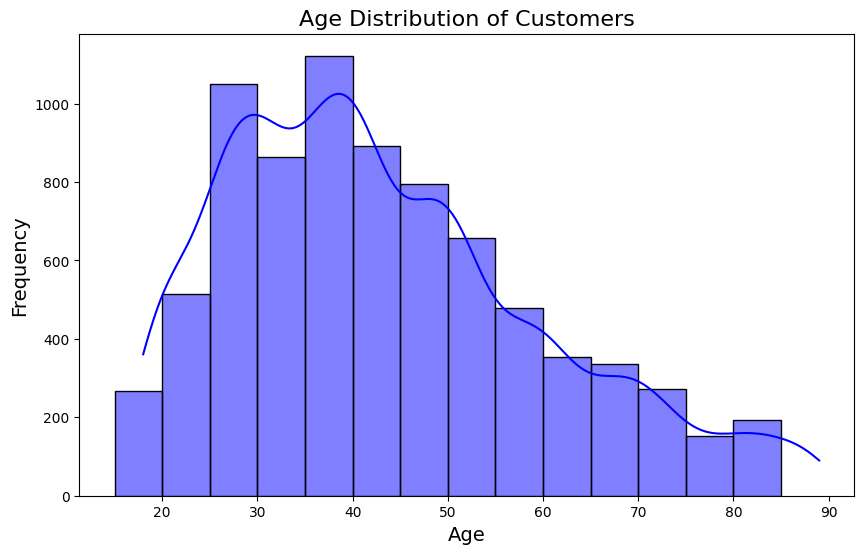

In [11]:
# Age Distribution Visualization

plt.figure(figsize = (10, 6))
sns.histplot(train_data['Age'], bins = list(range(15,90,5)), kde = True, color = 'blue')

plt.title('Age Distribution of Customers', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.show()

In [12]:
# Spending Power Data preparation, transfer spending_score into numbers
mapping = {'Low': 1, 'Average': 2, 'High': 3}
train_data['Numeric_spending'] = train_data['Spending_Score'].map(mapping)
train_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Numeric_spending
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,2
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,3
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A,3


In [13]:
# Spending Power Data preparation, Final step
Spending_bypro = train_data.groupby('Profession').sum('Numeric_spending').reset_index().sort_values('Numeric_spending', ascending = False)[['Profession', 'Numeric_spending']]
Spending_bypro

,Profession,Numeric_spending
0,Artist,4063
5,Healthcare,1495
4,Executive,1479
3,Entertainment,1381
7,Lawyer,1306
2,Engineer,1046
1,Doctor,953
8,Marketing,386
6,Homemaker,365


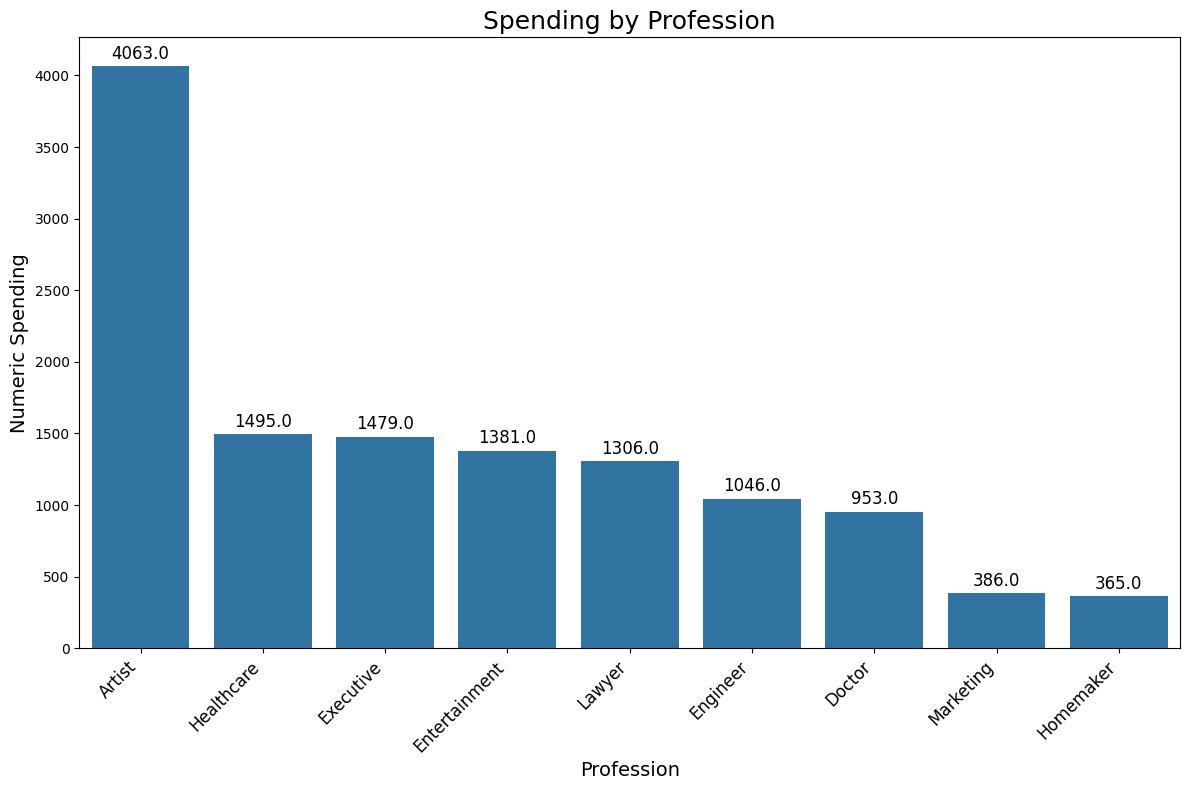

In [14]:
# Spending Power by Profession Visualization
plt.figure(figsize = (12, 8))
bar_plot = sns.barplot(x = 'Profession', y = 'Numeric_spending', data = Spending_bypro)

plt.title('Spending by Profession', fontsize = 18)
plt.xlabel('Profession', fontsize = 14)
plt.ylabel('Numeric Spending', fontsize = 14)

plt.xticks(rotation = 45, ha='right', fontsize = 12)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=12)

# Showing Plots
plt.tight_layout()
plt.show()

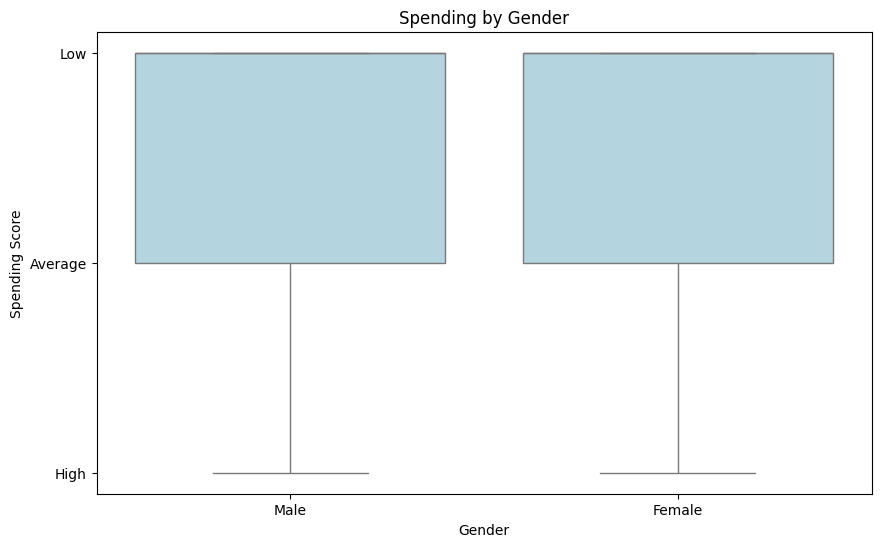

In [15]:
# Create the boxplot for Spending by Gender
plt.figure(figsize = (10, 6))
sns.boxplot(x='Gender', y='Spending_Score', data=train_data, color = "lightblue")
plt.title('Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

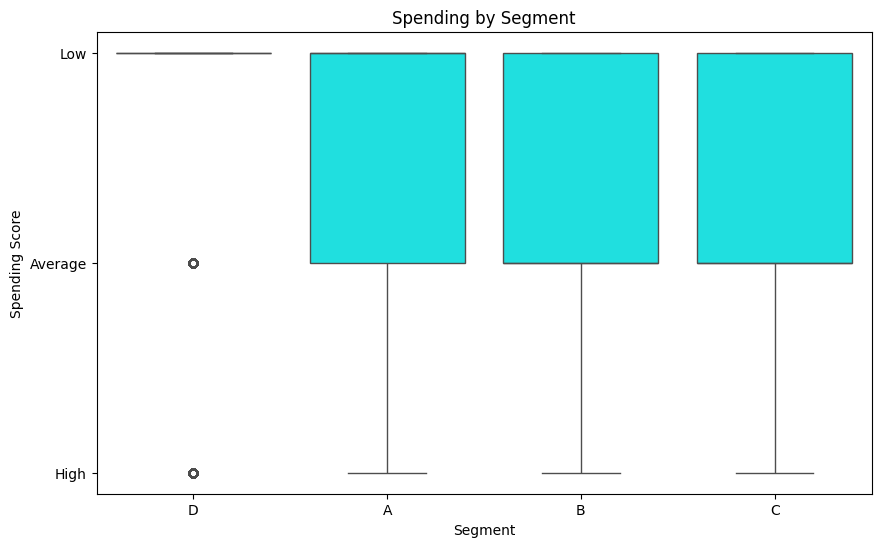

In [16]:
# Create the boxplot for Spending by Segment
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Segmentation', y = 'Spending_Score', data=train_data, color = "cyan")
plt.title('Spending by Segment')
plt.xlabel('Segment')
plt.ylabel('Spending Score')
plt.show()

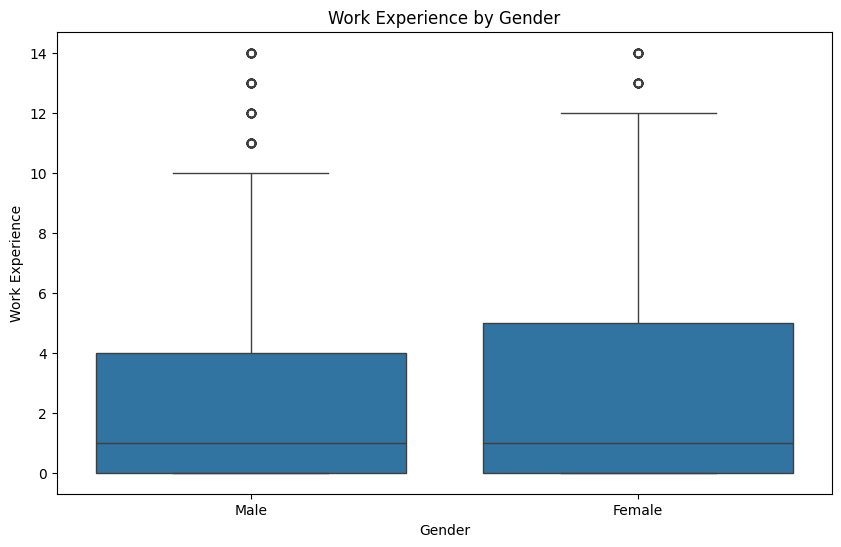

In [17]:
# Work Experience Analysis
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Gender', y = 'Work_Experience', data = train_data)
plt.title('Work Experience by Gender')
plt.xlabel('Gender')
plt.ylabel('Work Experience')
plt.show()

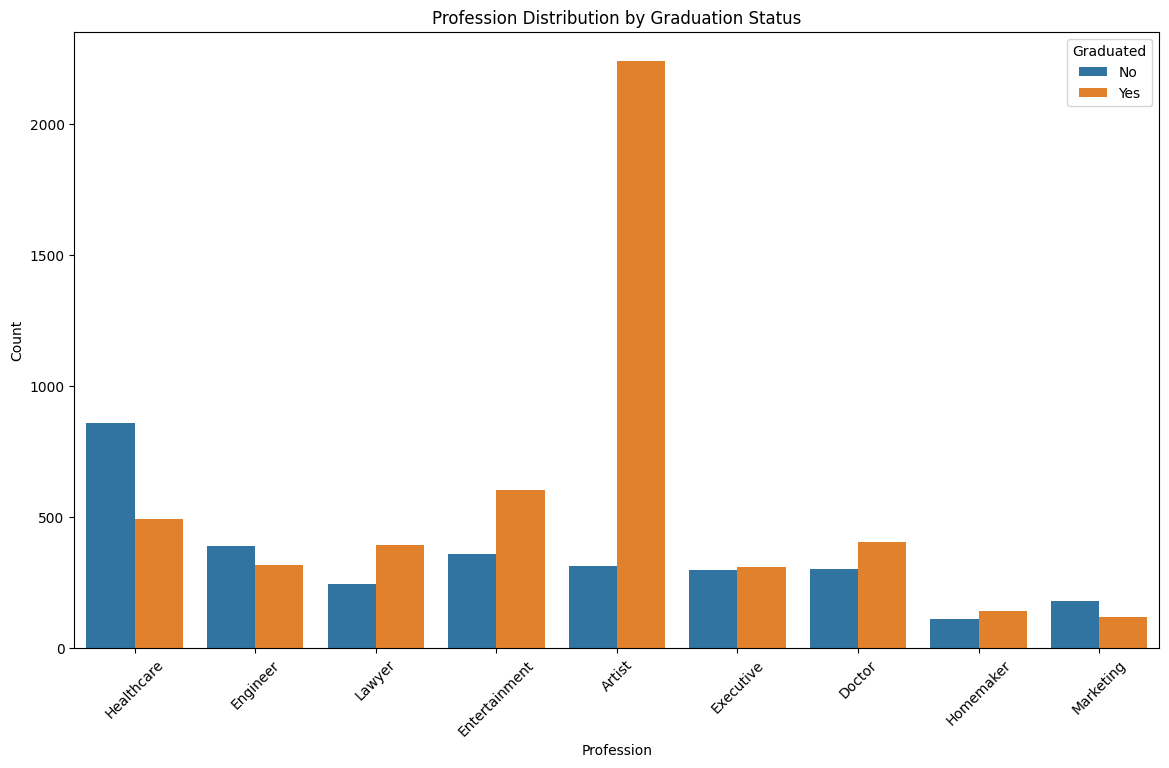

In [18]:
# Graduation Status and Profession
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Profession', hue = 'Graduated', data = train_data)
plt.title('Profession Distribution by Graduation Status')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

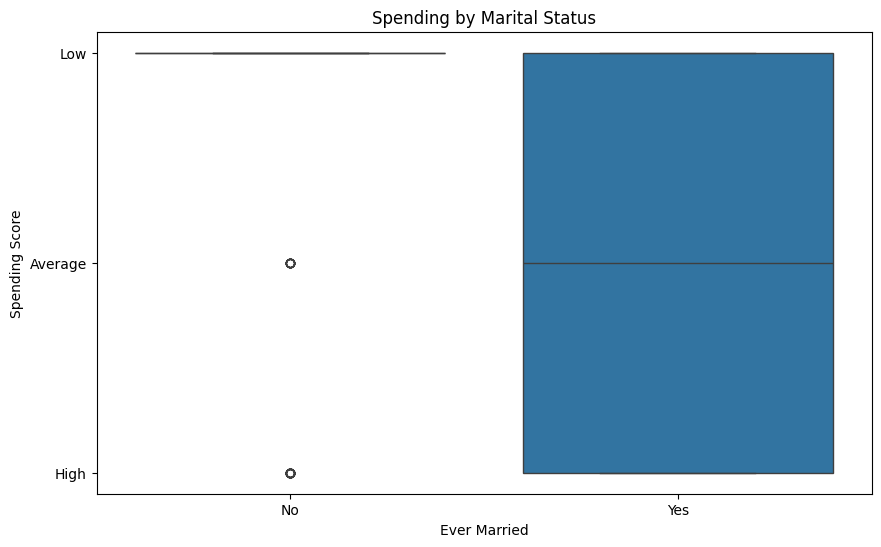

In [19]:
# Marital Status and Spending
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Ever_Married', y = 'Spending_Score', data = train_data)
plt.title('Spending by Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Spending Score')
plt.show()

### Correlation Matrix

We aim to create a correlation matrix of this dataset, however, there are a lot of categorical values in the dataset. Let us use LabelEncoder first before accessing the correlation matrix.

In [20]:
# Create a label encoder objects
label_encoder = LabelEncoder()

# List of Categorical values in the data
categorical_columns = [
    'Gender',
    'Ever_Married',
    'Graduated',
    'Profession',
    'Spending_Score',
    'Var_1',
    'Segmentation'
]

# Create a new dataframe to store data
numerical_train = train_data.copy().drop(columns = ['Numeric_spending'])

# Apply label encoding to each categorical columns
for column in categorical_columns:
    numerical_train[column] = label_encoder.fit_transform(numerical_train[column].astype(str))
    
# Check the results
numerical_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
1,462643,0,1,38,1,2,1.0,0,3.0,3,0
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,0.0,1,6.0,5,0


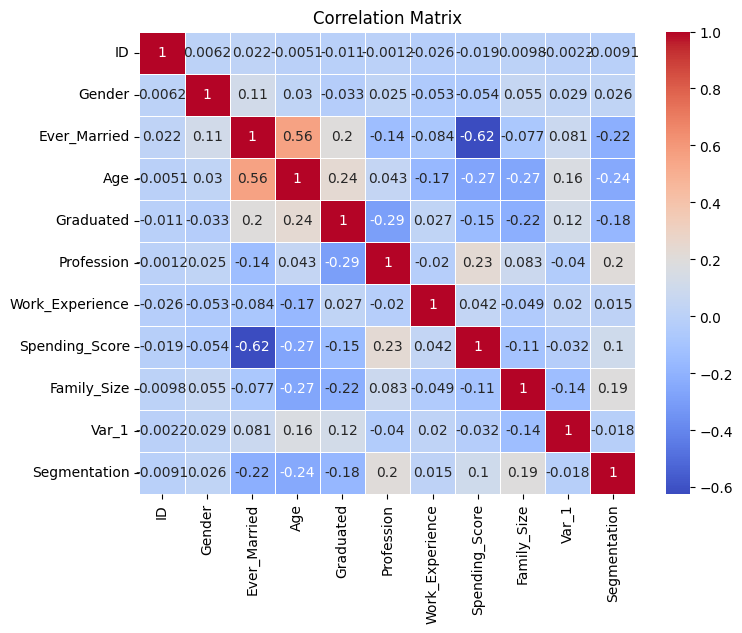

In [21]:
# Correlation Matrix Visualization
plt.figure(figsize = (8, 6))
corr_matrix = numerical_train.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

## Part III: Model Selection

Analysis:  
Throughout this part in Modeling, we will be mainly focuses in these areas:
1. Predictive Modeling for Spending Scores
    - Preferrably Linear Regression as we will transform Spending_Score to numerical
    - Decision Trees/Random Forest
    - Gradient Boosting Machines
    - Support Vector Machines
2. Customer Segmentation
    - Create new segments of customers based on clustering
    - For example: K-Means Clustering / Hierarchical Clustering
3. Customer Segmentation Prediction (Classification)
    - Predict customer segment (A, B, C, D) for new potential customers based on fetures in the training data
    - Logistic Regression / Random Forest Classifier / Gradient Boosting Classifier
4. Feature Importance Analysis
    - Identify which features are most important in predicting the target values, like Spending_score
    - For example: Random Forest / Gradient Boosting

In [22]:
# Define dependent and independent variables (or features and target)
X_train = numerical_train.drop(columns = ['Spending_Score', 'Segmentation'])
Y_train = numerical_train['Spending_Score']

# Create the categorical columns for test now,
# since it does not have 'Segmentation'
categorical_columns_test = [
    'Gender',
    'Ever_Married',
    'Graduated',
    'Profession',
    'Var_1',
    'Spending_Score'
]

# Copy and paste the test_data so that it won't modify the original data
numerical_test = test_data.copy()

# Label Encodering
for column in categorical_columns_test:
    numerical_test[column] = label_encoder.fit_transform(numerical_test[column].astype(str))

# Define dep and indep vars again
X_test = numerical_test.drop(columns = ['Spending_Score'])
Y_test = numerical_test['Spending_Score']

### Linear Regression Model:

In [23]:
# Start and train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.4f}')

Linear Regression MSE: 0.4134


### Decision Tree Regressor

In [24]:
# Start and train the Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state = 208)
dt_model.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = dt_model.predict(X_test)

# Evaluate model
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
print(f'Decision Tree Regressor MSE: {mse_dt:.4f}')

Decision Tree Regressor MSE: 0.3689


### Random Forest Regressor

In [25]:
# Start and train
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 208)
rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(f'Random Forest Regressor MSE: {mse_rf:.4f}')

Random Forest Regressor MSE: 0.1973


### Gradient Boosting Regressor

In [26]:
# Start and train
gbm_model = GradientBoostingRegressor(n_estimators = 100, random_state = 208)
gbm_model.fit(X_train, Y_train)

# Make predictions
Y_pred_gbm = gbm_model.predict(X_test)

# Evaluate Model
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
print(f'Gradient Boosting Regressor MSE: {mse_gbm:.4f}')

Gradient Boosting Regressor MSE: 0.3044


### Support Vector Regressor

In [27]:
# Start and train
svr_model = SVR()
svr_model.fit(X_train, Y_train)

# Make predictions
Y_pred_svr = svr_model.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(Y_test, Y_pred_svr)
print(f'Support Vector Regressor MSE: {mse_svr:.4f}')

Support Vector Regressor MSE: 0.9840


Looking at the SVR result above, it isn't the result we wanted to see, mainly due to an issue in choice of kernel, hyperparameters or even the nature of data itself. 
  
Below, we are going to explore ways to improve SVR performance (MSE)

In [28]:
# Standardize the data before implementing SVR improvements
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define parameter grids for GridSearchCV
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [0.1, 1, 10],
    'epsilon' : [0.01, 0.1, 1]
}

In [29]:
# GridSearchCV
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train_scaled, Y_train)

# Get the model from gridsearchcv
best_svr = grid_search.best_estimator_

# Make predictions
Y_pred_svr_scaled = best_svr.predict(X_test_scaled)

# Evaluate models
mse_svr_scaled = mean_squared_error(Y_test, Y_pred_svr_scaled)
print(f'Scaled Support Vector Regressor MSE: {mse_svr_scaled:.4f}')

Scaled Support Vector Regressor MSE: 0.3378


### Predictive Modeling Summary

In [30]:
# Create Model Performance
mse_performance_summary = {
    'Model': [
        'Linear Regression',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Scaled Support Vector Regressor'
    ],
    'MSE': [
        mse_lr,
        mse_dt,
        mse_rf,
        mse_gbm,
        mse_svr_scaled
    ]
}

performance_df = pd.DataFrame(mse_performance_summary)
performance_df

,Model,MSE
0,Linear Regression,0.413417
1,Decision Tree Regressor,0.368862
2,Random Forest Regressor,0.197269
3,Gradient Boosting Regressor,0.304380
4,Scaled Support Vector Regressor,0.337755


### Customer Segmentation Modeling

Beforing doing clustering modeling, we need to standardize our whole dataset before using clustering methods like KMeans.
  
Objective: Create new segments of customer based on clustering to understand different customer groups.
Approach: Use clustering techniques to identify distinct customer segments.

In [31]:
# First, we need to standardize features
scaled_train_data = scaler.fit_transform(numerical_train.drop(columns = ['ID'])) # since we dont need to use 'ID' column

# Second, find out optimal # of k using elbow method
wcss = [] # within-cluster sum of square for elbow method
for i in range(1, 11): # use 10
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        max_iter = 300,
        n_init = 10,
        random_state = 208
    )
    kmeans.fit(scaled_train_data)
    wcss.append(kmeans.inertia_)


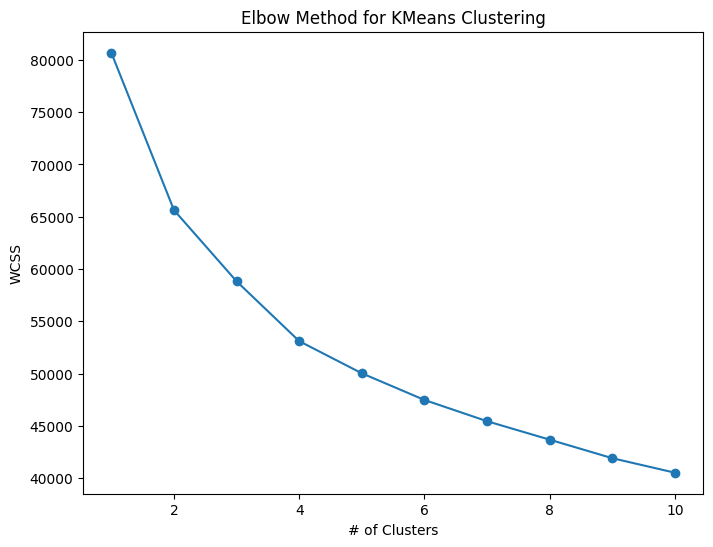

In [32]:
# Thirdly, plot the elbow methods in graph for better visz
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method for KMeans Clustering')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# Apply K-Means with the optimal number of clsuter based on graph above
kmeans = KMeans(
    n_clusters = 4,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 208
)
clusters = kmeans.fit_predict(scaled_train_data)

# Add labels to the `numerical_train` dataframe
numerical_train['Cluster'] = clusters

# Analyze the clusters
cluster_analysis = numerical_train.groupby('Cluster').mean()
cluster_analysis

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Cluster,,,,,,,,,,,
0,463462.096995,0.454463,0.414845,41.377049,0.828324,1.228142,3.112022,1.988160,1.913934,4.196721,0.801002
1,463554.754498,0.586565,0.997201,46.648541,0.757297,1.493003,2.572171,0.240304,3.207117,4.151939,1.410636
2,463415.966318,0.539372,0.086937,27.721438,0.284479,4.321802,2.865726,1.969504,3.739190,3.817478,2.609012
3,463468.670358,0.653322,0.959114,70.063884,0.581772,5.624361,1.333049,1.429302,2.153322,4.602215,1.348382


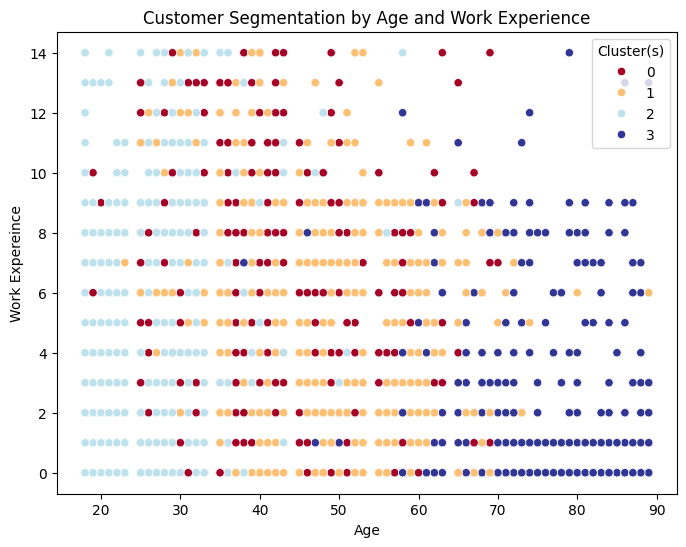

In [34]:
# Visualization of the clustering above
plt.figure(figsize = (8, 6))
sns.scatterplot(
    x = numerical_train['Age'],
    y = numerical_train['Work_Experience'],
    hue = numerical_train['Cluster'],
    palette = 'RdYlBu'
)
plt.title('Customer Segmentation by Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Expereince')
plt.legend(title = 'Cluster(s)')
plt.show()

### Customer Segmentation Prediction (CSP) (Using Classification)

In [35]:
# Then, seperate features from data
X_train_class = numerical_train.drop(columns = ['Segmentation', 'ID', 'Cluster']) # remove cluster as we do not need it here
Y_train_class = numerical_train['Segmentation']
X_test_class = numerical_test.drop(columns = ['ID'])
# Y_test_class does not exist as there is no Segmentation in test_data

In [36]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter = 1000, random_state = 208)
logreg_model.fit(X_train_class, Y_train_class)

# Predict segments for the test data
test_data['LogReg_Segmentation'] = logreg_model.predict(X_test_class)

In [37]:
# Random Forest Classifer
rfc_model = RandomForestClassifier(n_estimators = 100, random_state = 208)
rfc_model.fit(X_train_class, Y_train_class)

# Predict segments
test_data['RFC_Segmentation'] = rfc_model.predict(X_test_class)

In [38]:
# Gradient Boosting Classifer
gbc_model = GradientBoostingClassifier(n_estimators = 100, random_state = 208)
gbc_model.fit(X_train_class, Y_train_class)

# Predict segments
test_data['GBC_Segmentation'] = gbc_model.predict(X_test_class)

In [39]:
# Display the first few rows of `test_data` with the predicted segments
print(test_data[['ID', 'LogReg_Segmentation', 'RFC_Segmentation', 'GBC_Segmentation']].head())

       ID  LogReg_Segmentation  RFC_Segmentation  GBC_Segmentation
0  458989                    0                 1                 0
1  458994                    2                 2                 1
2  458996                    0                 0                 3
3  459000                    0                 2                 1
4  459001                    3                 3                 3


In [40]:
# Decode the predicted segments back to the original labels (A, B, C, D)
# test_data['LogReg_Segmentation'] = label_encoder.inverse_transform(test_data['LogReg_Segmentation'])
# test_data['RFC_Segmentation'] = label_encoder.inverse_transform(test_data['RFC_Segmentation'])
# test_data['GBC_Segmentation'] = label_encoder.inverse_transform(test_data['GBC_Segmentation'])
# Tried inverse transform, did not work

# Define the labels to be mapping
label_mapping = {
    0 : 'A',
    1 : 'B',
    2 : 'C',
    3 : 'D'
}

# Mannually transform the labels to original labels
test_data['LogReg_Segmentation'] = test_data['LogReg_Segmentation'].map(label_mapping)
test_data['RFC_Segmentation'] = test_data['RFC_Segmentation'].map(label_mapping)
test_data['GBC_Segmentation'] = test_data['GBC_Segmentation'].map(label_mapping)

# Display the first 5 rows again to verify it works
print(test_data[['ID', 'LogReg_Segmentation', 'RFC_Segmentation', 'GBC_Segmentation']].head())

       ID LogReg_Segmentation RFC_Segmentation GBC_Segmentation
0  458989                   A                B                A
1  458994                   C                C                B
2  458996                   A                A                D
3  459000                   A                C                B
4  459001                   D                D                D


In [41]:
# Now, with the Segmentations predicted by LogReg, RFC, and GBC,
# let us do a comparison consistency of predictions
consistency_comparison = test_data[['LogReg_Segmentation', 'RFC_Segmentation', 'GBC_Segmentation']].apply(pd.Series.value_counts)
print(consistency_comparison)

   LogReg_Segmentation  RFC_Segmentation  GBC_Segmentation
A                  713               629               718
B                  244               568               472
C                  783               638               609
D                  887               792               828


Although the results are in, we do not know which method we can trust than other methods to potentially decrease costs in developing these models when new customers come in

In [42]:
# Cross Validation Accuracy for Logistic Regression
logreg_cv_scores = cross_val_score(logreg_model, X_train_class, Y_train_class, cv = 5, scoring = 'accuracy')
Y_train_logreg_pred = cross_val_predict(logreg_model, X_train_class, Y_train_class, cv = 5)

print("Logistic Regression Classification Report:")
print(classification_report(Y_train_class, Y_train_logreg_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(Y_train_class, Y_train_logreg_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.43      1972
           1       0.36      0.14      0.20      1858
           2       0.48      0.61      0.54      1970
           3       0.61      0.74      0.67      2268

    accuracy                           0.50      8068
   macro avg       0.47      0.48      0.46      8068
weighted avg       0.47      0.50      0.47      8068

Logistic Regression Confusion Matrix:
[[ 876  189  412  495]
 [ 586  260  749  263]
 [ 282  202 1193  293]
 [ 395   77  128 1668]]


In [43]:
# Cross Validation for Random Forest Classifier
rfc_cv_scores = cross_val_score(rfc_model, X_train_class, Y_train_class, cv = 5, scoring = 'accuracy')
Y_train_rfc_pred = cross_val_predict(rfc_model, X_train_class, Y_train_class, cv = 5)

print("Random Forest Classifier Classification Report:")
print(classification_report(Y_train_class, Y_train_rfc_pred))
print("Random Forest Classifier Confusion Matrix:")
print(confusion_matrix(Y_train_class, Y_train_rfc_pred))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1972
           1       0.35      0.32      0.34      1858
           2       0.51      0.50      0.51      1970
           3       0.62      0.67      0.64      2268

    accuracy                           0.49      8068
   macro avg       0.47      0.48      0.47      8068
weighted avg       0.48      0.49      0.48      8068

Random Forest Classifier Confusion Matrix:
[[ 807  460  262  443]
 [ 461  603  560  234]
 [ 259  456  988  267]
 [ 435  182  130 1521]]


In [44]:
# Cross Validation for Gradient Boosting Classifier
gbc_cv_scores = cross_val_score(gbc_model, X_train_class, Y_train_class, cv = 5, scoring = 'accuracy')
Y_train_gbc_pred = cross_val_predict(gbc_model, X_train_class, Y_train_class, cv = 5)

print("Gradient Boosting Classifier Classification Report:")
print(classification_report(Y_train_class, Y_train_gbc_pred))
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix(Y_train_class, Y_train_gbc_pred))

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45      1972
           1       0.41      0.33      0.37      1858
           2       0.58      0.58      0.58      1970
           3       0.63      0.73      0.68      2268

    accuracy                           0.53      8068
   macro avg       0.52      0.52      0.52      8068
weighted avg       0.52      0.53      0.53      8068

Gradient Boosting Classifier Confusion Matrix:
[[ 896  418  222  436]
 [ 458  621  543  236]
 [ 199  353 1138  280]
 [ 446  111   58 1653]]


In [45]:
# Mean Cross-Validation Accuracy table
cv_summary_table = {
    'Logistic Regression CV:' : round(logreg_cv_scores.mean(), 4),
    'Random Forest Classifier CV:' : round(rfc_cv_scores.mean(), 4),
    'Gradient Boosting Classifier CV:' : round(gbc_cv_scores.mean(), 4)
}

# DataFrame
cv_summary_df = pd.DataFrame(cv_summary_table, index = [0])
cv_summary_df

,Logistic Regression CV:,Random Forest Classifier CV:,Gradient Boosting Classifier CV:
0,0.4954,0.4857,0.534


The cross-validation accuracy scores for the three models indicate their performance in predicting customer segments. The Gradient Boosting Classifier achieved the highest cross-validation accuracy score of 0.534, suggesting it has the best predictive power among the three models. The Logistic Regression and Random Forest Classifier had similar but lower accuracy scores of 0.4954 and 0.4857, respectively. This implies that the Gradient Boosting Classifier is the most reliable model for predicting customer segments in this dataset, outperforming the other two models in terms of accuracy. Yet, its accuracy score is too low to say that we are confident the future customer will land in certain segments, only some-what certain.